# DAP 5

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Using TensorFlow backend.


In [3]:
# grab data and split
df = pd.read_csv("../DAP2/processeddata/2018_Financial_Data.csv", index_col=0)
target_cols = ['priceCashFlowRatio', 
               'priceEarningsRatio', 
               'priceEarningsToGrowthRatio', 
               'priceBookValueRatio', 
               'currentRatio', 
               'quickRatio',
               'payoutRatio']
X = df[target_cols]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# show confusion matrix - written by dr bae
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Neural Network Construction

In [6]:
# test varying number of hidden layers, with varying number of nodes 
hidden_layer_range = range(1,3)
node_range = [10, 20, 50]

# test varying alpha parameter 
alpha_range = [0.01, 0.1, 1.0, 5.0]

# compare all models simultaneously
for layer_size in hidden_layer_range: 
    for node_size in node_range: 
        print ("Hidden Layers: ", layer_size, "with size ", node_size)
        for this_alpha in alpha_range:
            nnclf = MLPClassifier(
                hidden_layer_sizes=[node_size]*layer_size, 
                solver='lbfgs',
                alpha=this_alpha,
                random_state=0, max_iter=50000).fit(X_train_scaled, y_train)
            print('\tAlpha:',this_alpha)
            print('\t\tAccuracy of NN classifier on training set: {:.2f}'
                .format(nnclf.score(X_train_scaled, y_train)))
            print('\t\tAccuracy of NN classifier on test set: {:.2f}'
                .format(nnclf.score(X_test_scaled, y_test)))

Hidden Layers:  1 with size  10
	Alpha: 0.01
		Accuracy of NN classifier on training set: 0.77
		Accuracy of NN classifier on test set: 0.78
	Alpha: 0.1
		Accuracy of NN classifier on training set: 0.77
		Accuracy of NN classifier on test set: 0.75
	Alpha: 1.0
		Accuracy of NN classifier on training set: 0.76
		Accuracy of NN classifier on test set: 0.76
	Alpha: 5.0
		Accuracy of NN classifier on training set: 0.75
		Accuracy of NN classifier on test set: 0.77
Hidden Layers:  1 with size  20
	Alpha: 0.01
		Accuracy of NN classifier on training set: 0.79
		Accuracy of NN classifier on test set: 0.77
	Alpha: 0.1
		Accuracy of NN classifier on training set: 0.80
		Accuracy of NN classifier on test set: 0.77
	Alpha: 1.0
		Accuracy of NN classifier on training set: 0.77
		Accuracy of NN classifier on test set: 0.77
	Alpha: 5.0
		Accuracy of NN classifier on training set: 0.75
		Accuracy of NN classifier on test set: 0.77
Hidden Layers:  1 with size  50
	Alpha: 0.01
		Accuracy of NN classifi

In [7]:
# take best two and find optimal activation function 
print('NN1 - 1 10 0.01')
for this_activation in ['identity', 'logistic', 'tanh', 'relu']:
    # 1 10 0.01 
    nnclf1 = MLPClassifier(hidden_layer_sizes=[10], solver='lbfgs',
                          activation=this_activation,
                          alpha=0.01,
                          max_iter=10000,
                          random_state=0).fit(X_train_scaled, y_train)
    print ('Activation function', this_activation)
    print('\tAccuracy of NN classifier on training set: {:.2f}'
          .format(nnclf1.score(X_train_scaled, y_train)))
    print('\tAccuracy of NN classifier on test set: {:.2f}'
          .format(nnclf1.score(X_test_scaled, y_test)))
    
print('NN2 - 2 10 0.1')           
for this_activation in ['identity', 'logistic', 'tanh', 'relu']:
    # 2 10 0.1 
    nnclf2 = MLPClassifier(hidden_layer_sizes=[10, 10], solver='lbfgs',
                          activation=this_activation,
                          alpha=0.1,
                          max_iter=10000,
                          random_state=0).fit(X_train_scaled, y_train)
    print ('Activation function', this_activation)
    print('\tAccuracy of NN classifier on training set: {:.2f}'
          .format(nnclf2.score(X_train_scaled, y_train)))
    print('\tAccuracy of NN classifier on test set: {:.2f}'
          .format(nnclf2.score(X_test_scaled, y_test)))

NN1 - 1 10 0.01
Activation function identity
	Accuracy of NN classifier on training set: 0.75
	Accuracy of NN classifier on test set: 0.76
Activation function logistic
	Accuracy of NN classifier on training set: 0.80
	Accuracy of NN classifier on test set: 0.76
Activation function tanh
	Accuracy of NN classifier on training set: 0.80
	Accuracy of NN classifier on test set: 0.78
Activation function relu
	Accuracy of NN classifier on training set: 0.77
	Accuracy of NN classifier on test set: 0.78
NN2 - 2 10 0.1
Activation function identity
	Accuracy of NN classifier on training set: 0.75
	Accuracy of NN classifier on test set: 0.76
Activation function logistic
	Accuracy of NN classifier on training set: 0.80
	Accuracy of NN classifier on test set: 0.74
Activation function tanh
	Accuracy of NN classifier on training set: 0.87
	Accuracy of NN classifier on test set: 0.74
Activation function relu
	Accuracy of NN classifier on training set: 0.79
	Accuracy of NN classifier on test set: 0.77


## Analysis of Optimal Parameters

In [8]:
cls = {
    # 1 10 0.01 tanh
    'NN1' : MLPClassifier(hidden_layer_sizes=[10], activation='tanh', alpha=0.01, random_state=0, max_iter=50000),
    # 2 10 0.1 relu
    'NN2' : MLPClassifier(hidden_layer_sizes=[10, 10], activation='relu', alpha=0.1, random_state=0, max_iter=50000)
}

In [9]:
# create new split using optimal parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# assure accuracy 
print('Accuracy of NN1 classifier on training set: {:.2f}'
          .format(cls['NN1'].score(X_train_scaled, y_train)))
print('Accuracy of NN1 classifier on test set: {:.2f}'
          .format(cls['NN1'].score(X_test_scaled, y_test)))
print('\nAccuracy of NN2 classifier on training set: {:.2f}'
          .format(cls['NN2'].score(X_train_scaled, y_train)))
print('Accuracy of NN2 classifier on test set: {:.2f}'
          .format(cls['NN2'].score(X_test_scaled, y_test)))

Accuracy of NN1 classifier on training set: 0.75
Accuracy of NN1 classifier on test set: 0.75

Accuracy of NN2 classifier on training set: 0.74
Accuracy of NN2 classifier on test set: 0.77


NN1 
 [[ 16  77]
 [ 21 295]]


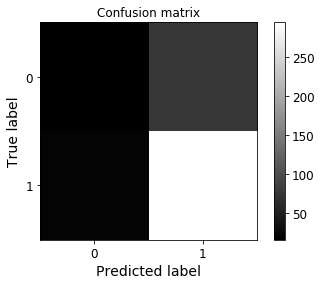

NN2 
 [[ 18  75]
 [ 27 289]]


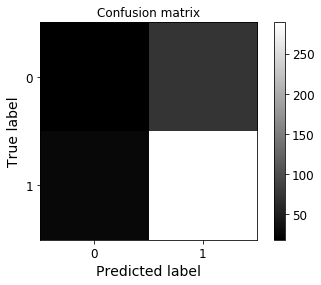

In [18]:
# print confusion matrix 
for cl in cls: 
    cls[cl].fit(X_train_scaled, y_train)
    y_pred = cls[cl].predict(X_test_scaled)

    # create and plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(cl,'\n',confusion_mat)
    plot_confusion_matrix(confusion_mat, 2)

NN1 Accuracy =  0.6365183067918878


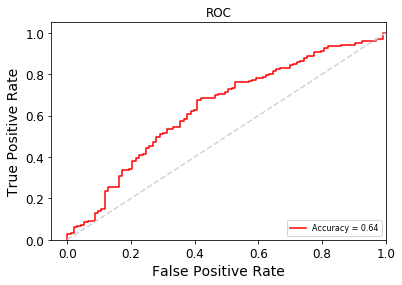

NN2 Accuracy =  0.6330134748877092


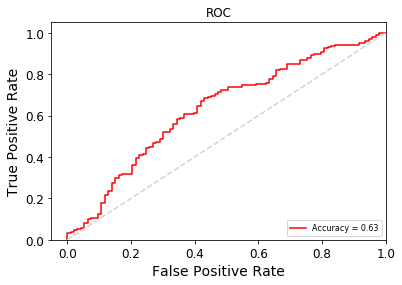

In [19]:
# roc curves 
for cl in cls: 
    y_pred = cls[cl].predict_proba(X_test_scaled)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(cl,'Accuracy = ', roc_auc)

    # Plotting
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c='r', label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

NN1 learning curve
NN2 learning curve


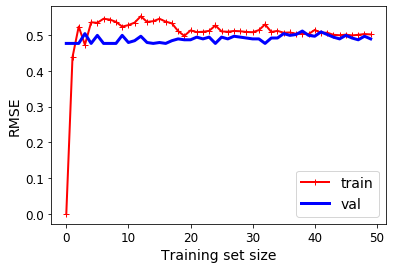

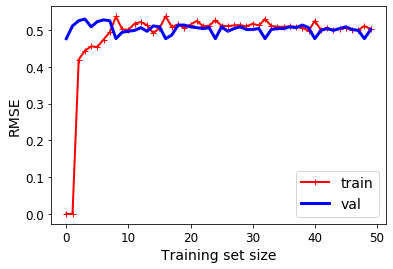

In [20]:
# learning curves
for cl in cls: 
    train_errors, test_errors = [], []
    plt.figure()
    for m in range(1, len(X_train_scaled), 25):
        cls[cl].fit(X_train_scaled[:m], y_train[:m])
        y_train_predict = cls[cl].predict(X_train_scaled[:m])
        y_test_predict = cls[cl].predict(X_test_scaled)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    print(cl,"learning curve")
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="lower right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)      

## Summary

   We tested range of one to two hidden layers, each with ten to fifty nodes per layer on a range of alphas from 0.01 to 5.0 and visually compared the training and testing accuracies to select several for further testing. We observed a tradeoff of training and testing accuracy as with higher training accuracy came lower testing accuracy as the model overfitted the data. Most of the NN's had similar accuracies, often to the nearest percent.  
   We opted to choose the best two in our opinion: one layer of ten nodes and an alpha of 0.01 and two layers of ten nodes and an alpha of 0.1. We then compared these against one another using a range of activation functions: identity, relu, tang and logistic. We observed that the first NN performed best with tanh and the second NN performed best with relu. 
   Once we had our optimal parameters, we began evaluating our models on a new split of data. We first analyzed confusion matrices of both NNs, observing that we have a very high number of true positives and a relatively low number of true negatives - possibly due to the imbalanced class distribution in our data. We could address this in the next phase through data resampling with replacement. Next, we plotted ROC and learning curves. It appears that our models perform alright on our data but not spectacularly. This could potentially be resolved through more processing power to test different combinations and larger ranges of parameters more efficiently.   